In [1]:
import numpy as np
import pywt
import cv2
import os
import pathlib as pl
import matplotlib
from matplotlib import pyplot as plt

In [2]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

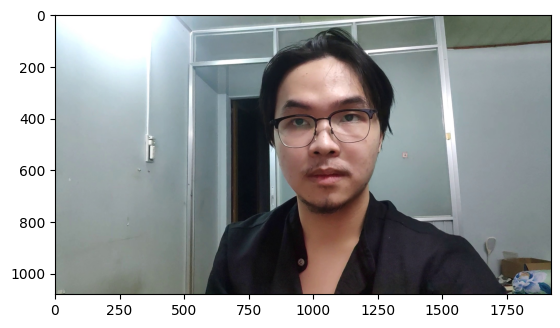

In [3]:
cropped_img = cv2.imread('input_images/Ha/0.jpg')
cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_img, cmap='gray')

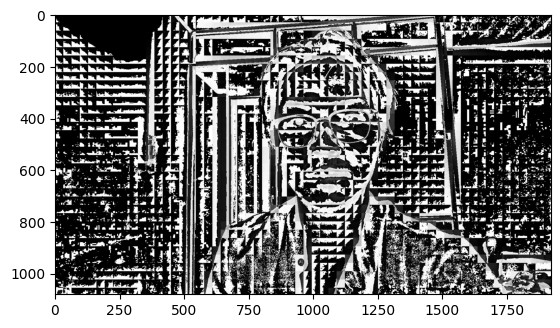

In [4]:
im_wave = w2d(cropped_img, 'db1', 5)
plt.imshow(im_wave, cmap='gray')

In [5]:
dataset = pl.Path('input_images').resolve()
imgpath = list(dataset.glob('*/*'))
imgclass = [imgpath.parent.stem for imgpath in imgpath]

In [6]:
# unique class
classes = np.unique(imgclass)
classes

array(['Embe', 'Ha'], dtype='<U4')

In [9]:
# crop face in every images of input_images subfolder
# save cropped images in cropped_faces subfolder
import dlib 

# Initialize dlib's face detector
detector = dlib.get_frontal_face_detector()

# Initialize dlib's shape predictor
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Load the input image
for user in imgpath:
    
    img = cv2.imread(str(user))
    # Convert image into grayscale
    gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)

    # Use detector to find landmarks
    faces = detector(gray)
    for face in faces:
        x1 = face.left() # left point
        y1 = face.top() # top point
        x2 = face.right() # right point
        y2 = face.bottom() # bottom point

        # Create landmark object
        landmarks = predictor(image=gray, box=face)
        
    # create folder for each person in cropped_images
    if not os.path.exists("C:\\Python Projects\\CPVFPT_git\\ASSIGNMENT\\cropped_faces"):
        os.makedirs("C:\\Python Projects\\CPVFPT_git\\ASSIGNMENT\\cropped_faces")
    if not os.path.exists("C:\\Python Projects\\CPVFPT_git\\ASSIGNMENT\\cropped_faces/" + user.parent.stem):
        os.makedirs("C:\\Python Projects\\CPVFPT_git\\ASSIGNMENT\\cropped_faces/" + user.parent.stem)

    # Crop image of above dimension
    # this will crop image according to detected face
    cropped_img = img[y1:y2, x1:x2]
    # Save cropped image in the output directory
    cv2.imwrite("C:\\Python Projects\\CPVFPT_git\\ASSIGNMENT\\cropped_faces/" + user.parent.stem + "/" + user.name, cropped_img)

In [7]:
imgpath

[WindowsPath('C:/Python Projects/CPVFPT_git/ASSIGNMENT/input_images/Embe/0.jpg'),
 WindowsPath('C:/Python Projects/CPVFPT_git/ASSIGNMENT/input_images/Embe/1.jpg'),
 WindowsPath('C:/Python Projects/CPVFPT_git/ASSIGNMENT/input_images/Embe/10.jpg'),
 WindowsPath('C:/Python Projects/CPVFPT_git/ASSIGNMENT/input_images/Embe/11.jpg'),
 WindowsPath('C:/Python Projects/CPVFPT_git/ASSIGNMENT/input_images/Embe/12.jpg'),
 WindowsPath('C:/Python Projects/CPVFPT_git/ASSIGNMENT/input_images/Embe/13.jpg'),
 WindowsPath('C:/Python Projects/CPVFPT_git/ASSIGNMENT/input_images/Embe/14.jpg'),
 WindowsPath('C:/Python Projects/CPVFPT_git/ASSIGNMENT/input_images/Embe/15.jpg'),
 WindowsPath('C:/Python Projects/CPVFPT_git/ASSIGNMENT/input_images/Embe/16.jpg'),
 WindowsPath('C:/Python Projects/CPVFPT_git/ASSIGNMENT/input_images/Embe/17.jpg'),
 WindowsPath('C:/Python Projects/CPVFPT_git/ASSIGNMENT/input_images/Embe/18.jpg'),
 WindowsPath('C:/Python Projects/CPVFPT_git/ASSIGNMENT/input_images/Embe/19.jpg'),
 Windo

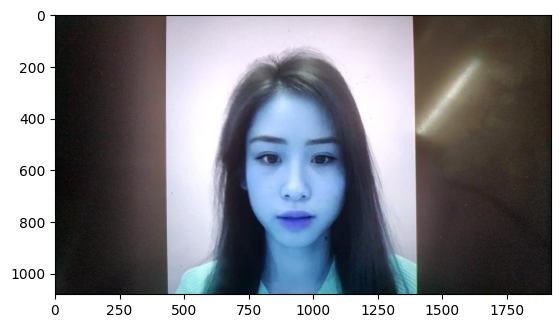

In [8]:
testIMG = imgpath
plt.imshow(cv2.imread(str(imgpath[20])))
plt.show()

In [9]:
name = []
nameDict = {}

for users in os.scandir('./cropped_faces'):
    if users.is_dir():
        name.append(users.name)
        nameDict[users.name] = []
    for images in os.scandir(users.path):
        nameDict[users.name].append(images.path)

nameDict.keys()

dict_keys(['Embe', 'Ha'])

In [10]:
UserName = []
UserNameDict = {}
for i in range(len(classes)):
    UserName.append(classes[i])
    UserNameDict[UserName[i]] = i
UserNameDict

{'Embe': 0, 'Ha': 1}

In [11]:
# count how many images we have for each person
countDict = {}
count = 0
for i in range(len(imgpath)):
    if imgpath[i].parent.stem not in countDict:
        countDict[imgpath[i].parent.stem] = 1
    else:
        countDict[imgpath[i].parent.stem] += 1
countDict

{'Embe': 49, 'Ha': 52}

In [12]:
# cropped face count
cropped_img = pl.Path('cropped_faces').resolve()
cropped_img = list(cropped_img.glob('*/*'))
cropped_img[1]

WindowsPath('C:/Python Projects/CPVFPT_git/ASSIGNMENT/cropped_faces/Embe/1.jpg')

In [13]:
cropDict = {}
cropped = 0
for i in range(len(cropped_img)):
    if cropped_img[i].parent.stem not in cropDict:
        cropDict[cropped_img[i].parent.stem] = 1
    else:
        cropDict[cropped_img[i].parent.stem] += 1
cropDict

{'Embe': 49, 'Ha': 52}

In [14]:
nameDict[name[1]]

['./cropped_faces\\Ha\\0.jpg',
 './cropped_faces\\Ha\\1.jpg',
 './cropped_faces\\Ha\\10.jpg',
 './cropped_faces\\Ha\\11.jpg',
 './cropped_faces\\Ha\\12.jpg',
 './cropped_faces\\Ha\\13.jpg',
 './cropped_faces\\Ha\\14.jpg',
 './cropped_faces\\Ha\\15.jpg',
 './cropped_faces\\Ha\\16.jpg',
 './cropped_faces\\Ha\\17.jpg',
 './cropped_faces\\Ha\\18.jpg',
 './cropped_faces\\Ha\\19.jpg',
 './cropped_faces\\Ha\\2.jpg',
 './cropped_faces\\Ha\\20.jpg',
 './cropped_faces\\Ha\\21.jpg',
 './cropped_faces\\Ha\\22.jpg',
 './cropped_faces\\Ha\\23.jpg',
 './cropped_faces\\Ha\\24.jpg',
 './cropped_faces\\Ha\\25.jpg',
 './cropped_faces\\Ha\\26.jpg',
 './cropped_faces\\Ha\\27.jpg',
 './cropped_faces\\Ha\\28.jpg',
 './cropped_faces\\Ha\\29.jpg',
 './cropped_faces\\Ha\\3.jpg',
 './cropped_faces\\Ha\\30.jpg',
 './cropped_faces\\Ha\\31.jpg',
 './cropped_faces\\Ha\\32.jpg',
 './cropped_faces\\Ha\\33.jpg',
 './cropped_faces\\Ha\\34.jpg',
 './cropped_faces\\Ha\\35.jpg',
 './cropped_faces\\Ha\\36.jpg',
 './cropped_

In [15]:
#stack raw image i.e png and the wavelet image together (prepare it for training and testing)
X, y = [], []
imgsize = (64,64)
for User_name, trainingFile in nameDict.items():
    for img_path in trainingFile:
        img = cv2.imread(img_path)
        if img is None:
            continue
        scaleImg = cv2.resize(img, imgsize)
        waveletImg = w2d(img, 'db1', 5)
        scale_waveletImg = cv2.resize(waveletImg, imgsize)
        combinedImg = np.vstack((scaleImg.reshape(64*64*3,1), scale_waveletImg.reshape(64 * 64, 1)))
        X.append(combinedImg)
        y.append(UserNameDict[User_name])
print(len(X[0]))
X = np.array(X).reshape(len(X), (64 * 64 * 3 + 64*64)).astype(float)
print(X.shape)

16384
(101, 16384)


In [16]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 1))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9615384615384616

In [18]:
for name, val in UserNameDict.items():
    print(name, val)

Embe 0
Ha 1


In [19]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.92      1.00      0.96        12

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26



In [20]:

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [21]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [22]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,1.0,"{'svc__C': 1, 'svc__kernel': 'rbf'}"
1,random_forest,1.0,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,1.0,{'logisticregression__C': 1}


In [23]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=1, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [24]:
best_estimators['svm'].score(X_test, y_test)

1.0

In [25]:
best_clf = best_estimators['svm']

# Lets Plot the data and see the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[14,  0],
       [ 0, 12]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

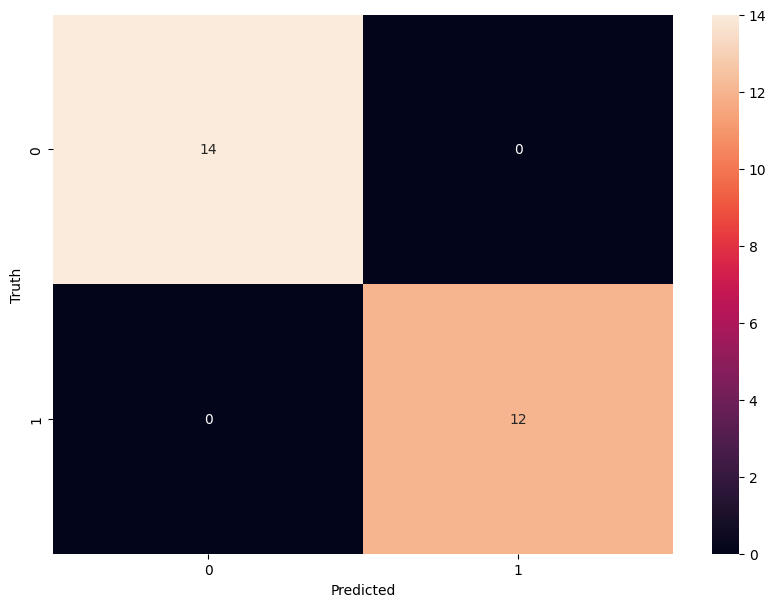

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
!pip install joblib

In [28]:
import joblib
# save the model now
joblib.dump(best_clf, 'svm_model.pkl')

['svm_model.pkl']

In [29]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(UserNameDict))

In [32]:
# realtime detection
import cv2
import numpy as np
import mediapipe as mp

# load the model
model = joblib.load('svm_model.pkl')
# load the class dictionary
class_dict = json.load(open('class_dictionary.json'))

# Initialize mediapipe Face Mesh and detection
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh
cap = cv2.VideoCapture('rtsp://192.168.31.211:8080/h264_pcm.sdp')
with mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as face_mesh:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            continue
        # Flip the image horizontally for a later selfie-view display, and convert
        # the BGR image to RGB.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        results = face_mesh.process(image)
        # Draw the face mesh annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(
                    image=image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_CONTOURS,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
                
                # extract the face from the image
                with mp_face_mesh.FaceMesh(
                        max_num_faces=1,
                        refine_landmarks=True,
                        min_detection_confidence=0.5,
                        min_tracking_confidence=0.5) as face_mesh:
                        while cap.isOpened():
                            success, image = cap.read()
                            if not success:
                                print("Ignoring empty camera frame.")
                                continue
                            # Flip the image horizontally for a later selfie-view display, and convert
                            # the BGR image to RGB.
                            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                            # To improve performance, optionally mark the image as not writeable to
                            # pass by reference.
                            image.flags.writeable = False
                            results = face_mesh.process(image)
                            # Draw the face mesh annotations on the image.
                            image.flags.writeable = True
                            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                            if results.multi_face_landmarks:
                                for face_landmarks in results.multi_face_landmarks:
                                    mp_drawing.draw_landmarks(
                                        image=image,
                                        landmark_list=face_landmarks,
                                        connections=mp_face_mesh.FACEMESH_CONTOURS,
                                        landmark_drawing_spec=None,
                                        connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
                                    
                                    # extract the face from the image
                                    x1, y1 = face_landmarks.landmark[10].x, face_landmarks.landmark[10].y
                                    x2, y2 = face_landmarks.landmark[152].x, face_landmarks.landmark[152].y
                                    h, w, c = image.shape
                                    x1, y1 = int(x1*w), int(y1*h)
                                    x2, y2 = int(x2*w), int(y2*h)
                                    face = image[y1:y2, x1:x2]
                                    face = cv2.resize(face, (224, 224))
                                    face = face.reshape(1, 224, 224, 3)
                                    # pass the face to the model
                                    pred = model.predict(face)
                                    # get the name of the person
                                    name = class_dict[str(pred[0])]
                                    # draw the name on the image
                                    cv2.putText(image, name, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        cv2.imshow('MediaPipe FaceMesh', image)
        if cv2.waitKey(5) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()
                                        


ValueError: Found array with dim 4. StandardScaler expected <= 2.